`Created in Apl 2024`

`File: CGAN_gen_testbench.py`

`@author: Pavan Mohan Neelamraju`

`Affiliation: Indian Institute of Technology - Madras,`

**Email**: npavanmohan3@gmail.com

**Description**: This program shows the proper set up of a trained generator of C-GAN model for prediction of Response Spectra.

**Website**: [pavanmohann.github.io](https://pavanmohann.github.io/)


---



In [14]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [15]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# 'eqm','ftype','hyp','dist','log_dist','log_vs30','dir']
eqm = float(input('Earthquake Magnitude $M_w$ '))
f = float(input('Fault Type $F$ '))
hd = float(input('Hypocentre Depth $H_d$ '))
dist = float(input('RJB Distance $R_{JB}$ '))
logdist = np.log(dist)
vs30 = float(input('Vs30 $V_{s30}$ '))
logvs30 = np.log(vs30)
dir = float(input('Direction $dir$ '))
l1 = [eqm, f, hd, dist, logdist, vs30, logvs30, dir]

Earthquake Magnitude $M_w$ 5
Fault Type $F$ 1
Hypocentre Depth $H_d$ 8
RJB Distance $R_{JB}$ 200
Vs30 $V_{s30}$ 500
Direction $dir$ 1


In [17]:
num = int(input('Enter the value of a record to analyse the response spectra [0 to 23,928]: '))

Enter the value of a record to analyse the response spectra [0 to 23,928]: 2


In [18]:
df = pd.read_csv('/content/drive/MyDrive/SDA Codes/Complete_GAN/final_data.csv')
df.shape

(23929, 33)

In [19]:
# Assuming you have your features in a variable named X and your labels in a variable named Y

X = df[['eqm','ftype','hyp','dist','log_dist','log_vs30','dir']]
Y = df[['pga',
'T0.010S',
'T0.020S',
'T0.030S',
'T0.040S',
'T0.050S',
'T0.060S',
'T0.070S',
'T0.080S',
'T0.090S',
'T0.150S',
'T0.200S',
'T0.300S',
'T0.500S',
'T0.600S',
'T0.700S',
'T0.800S',
'T0.900S',
'T1.000S',
'T1.200S',
'T1.500S',
'T2.000S',
'T3.000S',
'T4.000S',
]]

X = X.dropna()
Y = Y.dropna()

testing_sample_x = X.iloc[num,:]
testing_sample_y = Y.iloc[num,:]

from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)

Y_scaler = MinMaxScaler()

Y_scaled = Y_scaler.fit_transform(Y)

In [23]:
from keras.layers import Layer
import keras.backend as K
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


class StochasticInputLayer(Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(StochasticInputLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(StochasticInputLayer, self).build(input_shape)

    def call(self, x):

        noise = K.random_normal(shape=(self.output_dim,), mean=0., stddev=0.01)
        return x + x * noise

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)


In [24]:
from keras.models import load_model

In [25]:
custom_objects = {'StochasticInputLayer': StochasticInputLayer}

# Load the model
model = load_model('/content/drive/MyDrive/SDA Codes/Complete_GAN/cgan_gen_1.hdf5', custom_objects=custom_objects)


In [26]:
time_periods = [0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09, 0.15, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.5, 2, 3, 4]

# Assuming x_vals is your unscaled input
x_vals = [testing_sample_x]
## 'eqm','ftype','hyp','dist','log_dist','log_vs30','dir'
# Use the fitted scaler to transform the inputs
x_vals_scaled = X_scaler.transform(x_vals)

# Use the model to predict the output
y_pred_scaled = model.predict(x_vals_scaled)

# Use the fitted scaler to inverse transform the predicted output
y_pred = Y_scaler.inverse_transform(y_pred_scaled)

print("Predicted Immediate output:", y_pred)
# plt.plot(y_pred[0])
# plt.ylim([0,0.5])

asd = testing_sample_x.to_list()
asdf = []
for i in asd:
  if asd.index(i) != 5:
    asdf.append(i)
  else:
    asdf.append(np.exp(i))
# 'eqm','ftype','hyp','dist','log_dist','log_vs30','dir'
print(asdf)

1/1 [==============================] - 0s 154ms/step
Predicted Immediate output: [[0.01304494 0.01314485 0.01338036 0.01384815 0.01548573 0.01675975
  0.01868963 0.02103579 0.02364044 0.0257504  0.033558   0.03311816
  0.02658443 0.01722733 0.01341297 0.01131645 0.00972536 0.00798158
  0.00622255 0.00440895 0.00273162 0.00163423 0.00076812 0.00042274]]
[5.0, 0.0, 16.0, 32.44, 3.479392229247212, 213.43999999999994, 0.0]


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 stochastic_input_layer (St  (None, 7)                 0         
 ochasticInputLayer)                                             
                                                                 
 dense (Dense)               (None, 182)               1456      
                                                                 
 dense_1 (Dense)             (None, 182)               33306     
                                                                 
 dense_2 (Dense)             (None, 182)               33306     
                                                                 
 dense_3 (Dense)             (None, 182)               33306     
                                                                 
 dense_4 (Dense)             (None, 24)                4392      
                                                        

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
fontsize = 14

def make_predictions(model, X_scaler, Y_scaler, testing_sample_x, num_predictions=75):
    # Scale the input values
    x_vals_scaled = X_scaler.transform([testing_sample_x])

    # Make predictions
    y_pred_scaled = [model.predict(x_vals_scaled, verbose=0) for _ in range(num_predictions)]

    # Inverse transform the predicted output
    predictions = [Y_scaler.inverse_transform(y)[0] for y in y_pred_scaled]

    return np.array(predictions)


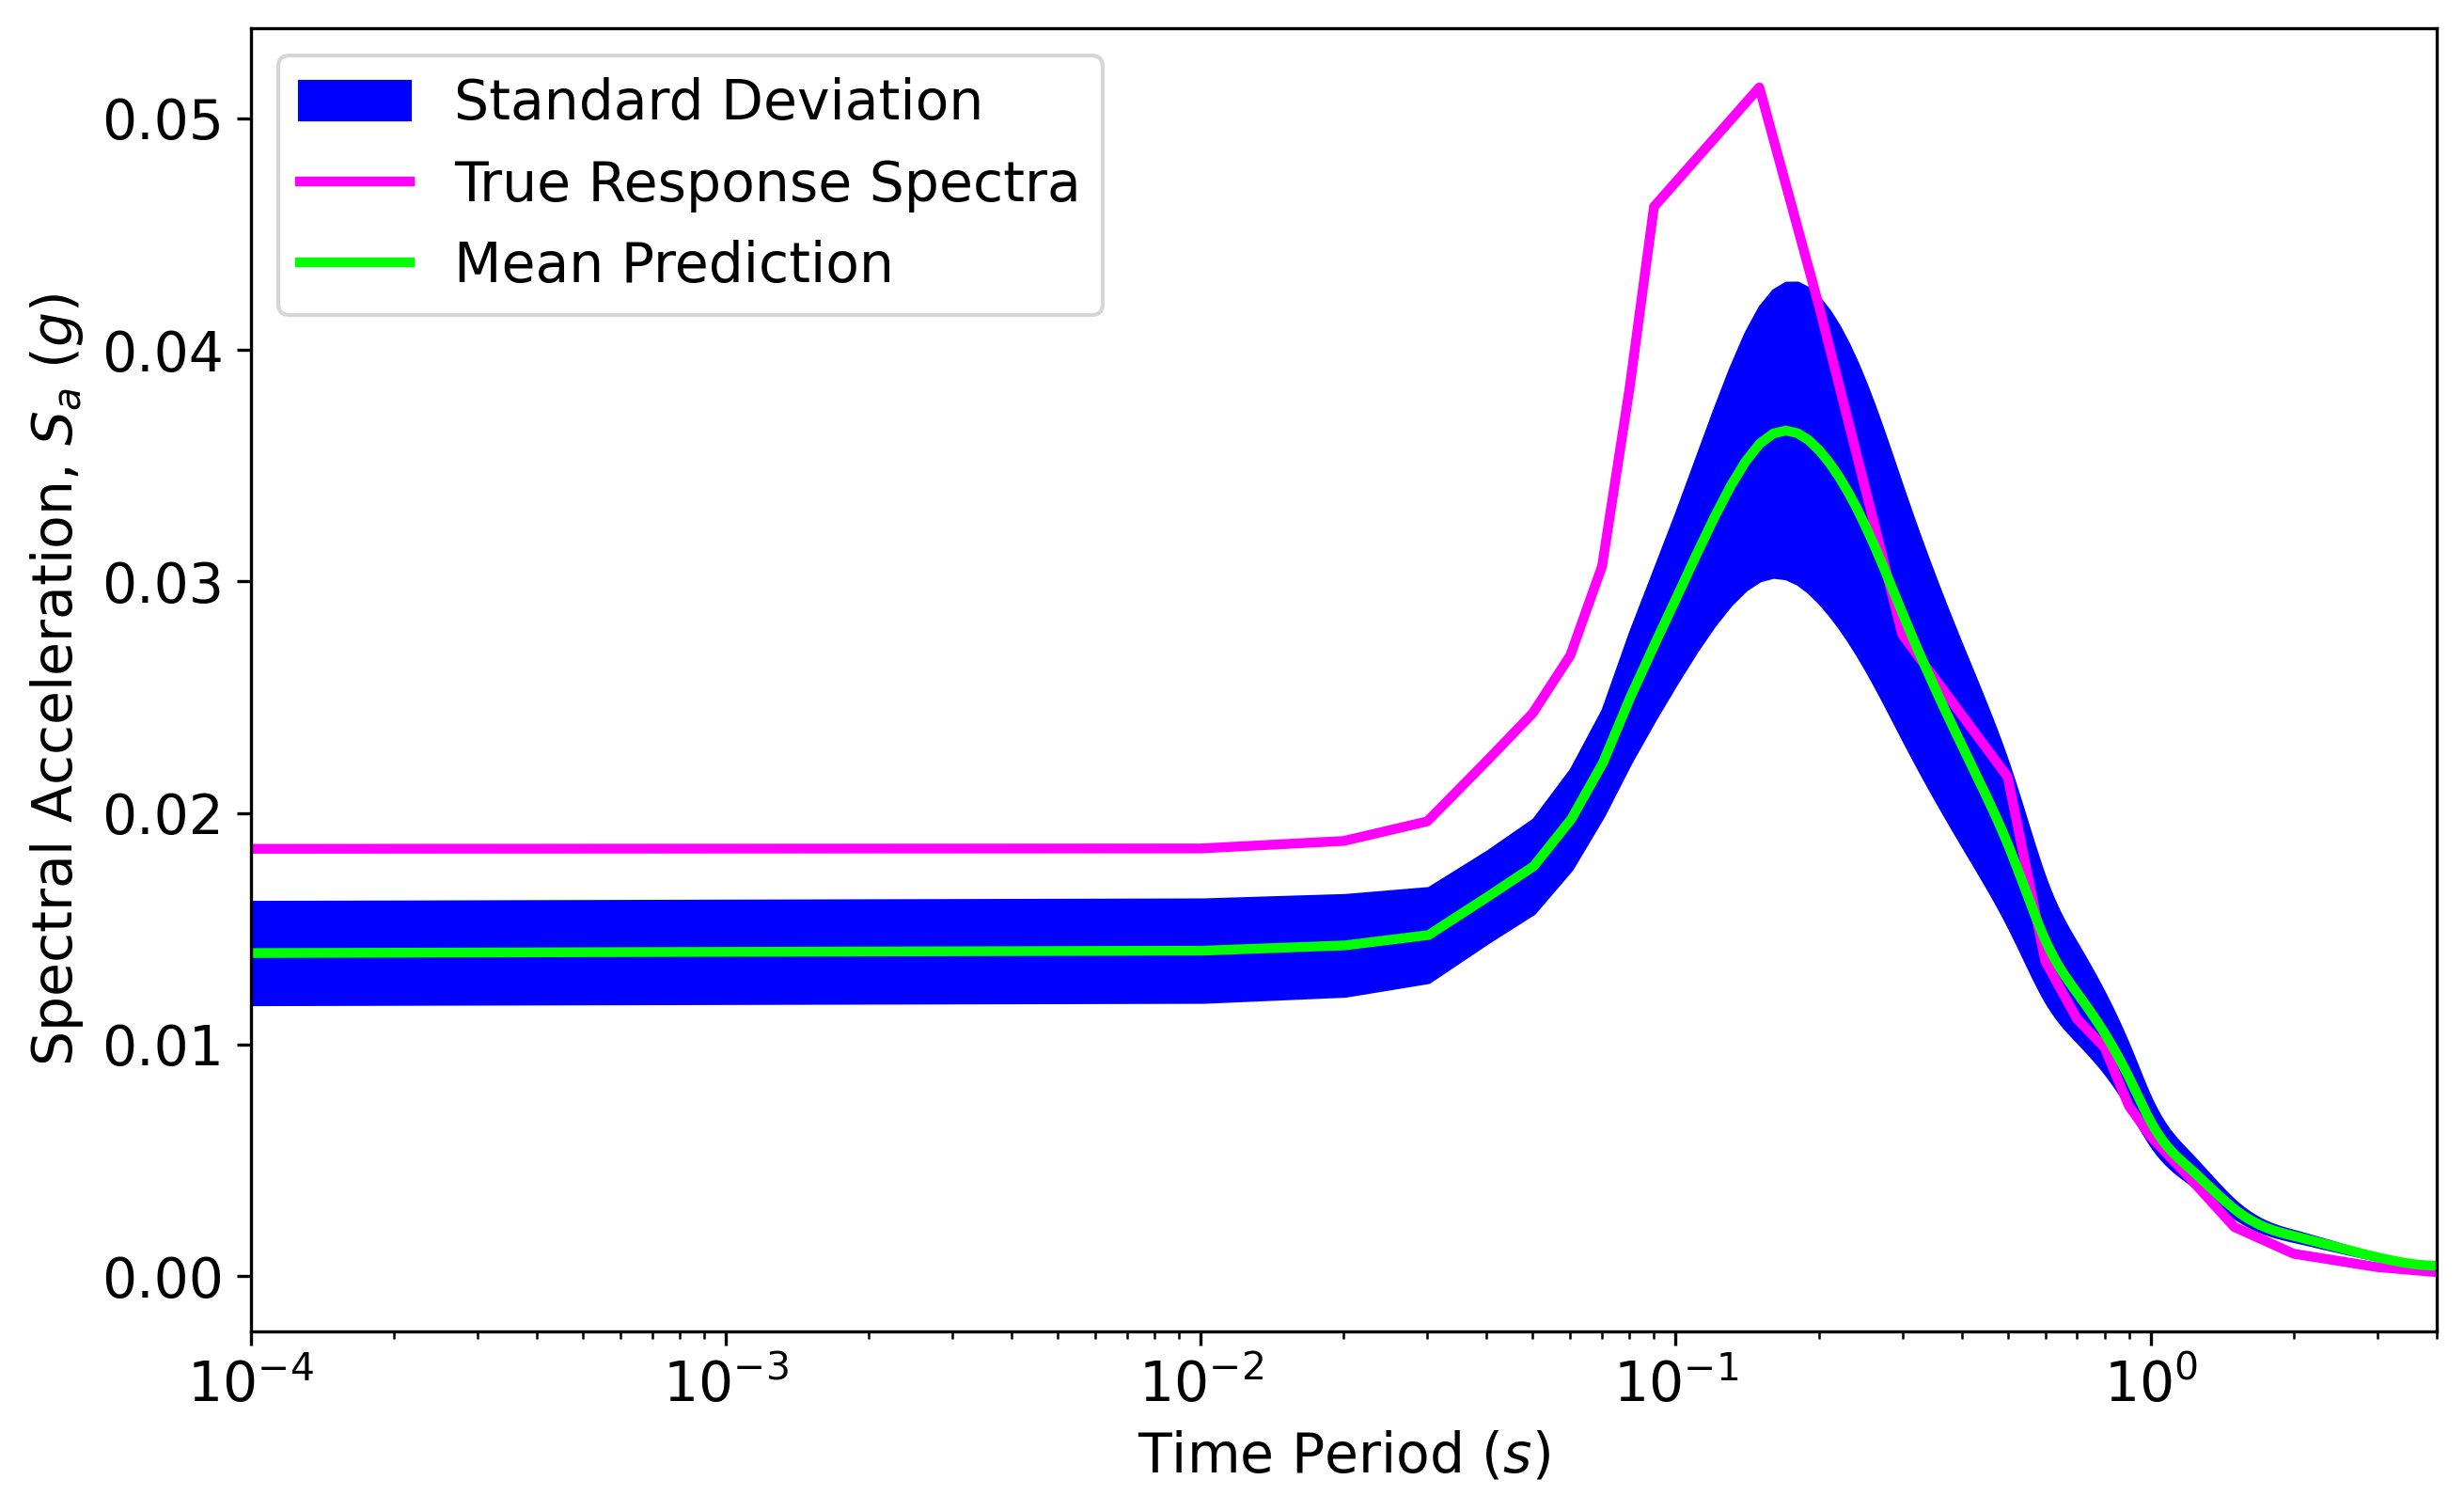

In [29]:
def plot_predictions_and_true_values(predictions, true_values, time_periods):
    # Calculate the mean and standard deviation of the predictions
    mean = np.mean(predictions, axis=0)
    std_dev = np.std(predictions, axis=0)

    # Define the x values for the plot
    x = np.array(time_periods)

    # Create a spline for the mean
    mean_spline = make_interp_spline(x, mean)
    xnew = np.linspace(x.min(), x.max(), 400)
    mean_smooth = mean_spline(xnew)

    # Create a spline for the standard deviation
    std_dev_spline = make_interp_spline(x, std_dev)
    std_dev_smooth = std_dev_spline(xnew)

    # Plot the mean and standard deviation of the predictions
    plt.figure(figsize=(10, 6), dpi=300)  # Adjust plot size and set DPI
    plt.fill_between(xnew, mean_smooth - std_dev_smooth, mean_smooth + std_dev_smooth, color='b', alpha=1,
                     label='Standard Deviation')

    # Plot true response spectra
    plt.plot(time_periods, true_values, color='magenta', linewidth=2.5, label='True Response Spectra')
    plt.plot(xnew, mean_smooth, label='Mean Prediction', color='lime', linewidth=2.5)

    plt.xscale('log')
    plt.xlabel('Time Period ($s$)',fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlim([0.0001,4])
    plt.ylabel('Spectral Acceleration, $S_a$ ($g$)',fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.show()

# Make predictions
predictions = make_predictions(model, X_scaler, Y_scaler, testing_sample_x)

# Plot predictions and true values
plot_predictions_and_true_values(predictions, testing_sample_y, time_periods)


In [30]:
asdf
# 'eqm','ftype','hyp','dist','log_dist','log_vs30','dir'

[5.0, 0.0, 16.0, 32.44, 3.479392229247212, 213.43999999999994, 0.0]

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

fontsize = 14

def make_predictions(model, X_scaler, Y_scaler, testing_sample_x, num_predictions=75):
    # Scale the input values
    x_vals_scaled = X_scaler.transform([testing_sample_x])

    # Make predictions
    y_pred_scaled = [model.predict(x_vals_scaled, verbose=0) for _ in range(num_predictions)]

    # Inverse transform the predicted output
    predictions = [Y_scaler.inverse_transform(y)[0] for y in y_pred_scaled]

    return np.array(predictions)

# Example usage
l1 = [eqm, f, hd, dist, logdist, logvs30, dir]
predictions = make_predictions(model, X_scaler, Y_scaler, l1)


[[ 1.6797266e-04  1.8218051e-04  1.2439828e-04 ... -2.4711285e-04
   5.8501897e-05 -3.6517213e-05]
 [ 2.8050429e-04  2.9572868e-04  2.4177681e-04 ... -2.3146874e-04
   6.3315390e-05 -3.2659984e-05]
 [ 2.2860458e-04  2.4336023e-04  1.8764148e-04 ... -2.3868389e-04
   6.1095387e-05 -3.4438963e-05]
 ...
 [ 2.1376798e-04  2.2838998e-04  1.7216594e-04 ... -2.4074641e-04
   6.0460785e-05 -3.4947490e-05]
 [ 1.7577680e-04  1.9005530e-04  1.3253895e-04 ... -2.4602780e-04
   5.8835729e-05 -3.6249719e-05]
 [ 1.9409391e-04  2.0853747e-04  1.5164429e-04 ... -2.4348148e-04
   5.9619208e-05 -3.5621866e-05]]
